In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Simulated example data
durations = np.random.exponential(scale=180, size=100)  # days to upgrade or censor
event_observed = np.random.binomial(1, 0.7, size=100)  # 1 if upgraded, 0 if censored

kmf = KaplanMeierFitter()
kmf.fit(durations, event_observed, label="Green Tier Upgrade")

plt.figure(figsize=(8,5))
kmf.plot_survival_function()
plt.title("Kaplan–Meier Curve: Time to Upgrade from Green Tier")
plt.xlabel("Days since entry to Green Tier")
plt.ylabel("Proportion still in Green Tier")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Simulated data setup
np.random.seed(42)

# Create synthetic durations (days until upgrade or censor)
# and events (1=upgraded, 0=censored) for 3 frequency groups

n = 100  # number of customers per group

# Low frequency: slower upgrades (longer times)
durations_low = np.random.exponential(scale=250, size=n)
events_low = np.random.binomial(1, 0.6, size=n)  # 60% upgraded

# Medium frequency: medium speed upgrades
durations_med = np.random.exponential(scale=180, size=n)
events_med = np.random.binomial(1, 0.7, size=n)

# High frequency: faster upgrades
durations_high = np.random.exponential(scale=120, size=n)
events_high = np.random.binomial(1, 0.8, size=n)

kmf = KaplanMeierFitter()

plt.figure(figsize=(10,6))

# Plot Low frequency group
kmf.fit(durations_low, event_observed=events_low, label="Low Visit Frequency")
kmf.plot_survival_function()

# Plot Medium frequency group
kmf.fit(durations_med, event_observed=events_med, label="Medium Visit Frequency")
kmf.plot_survival_function()

# Plot High frequency group
kmf.fit(durations_high, event_observed=events_high, label="High Visit Frequency")
kmf.plot_survival_function()

plt.title("Kaplan–Meier Curves by Visit Frequency Group")
plt.xlabel("Days Since Entering Green Tier")
plt.ylabel("Proportion Still in Green Tier (Not Upgraded)")
plt.legend()
plt.grid(True)
plt.show()

# Statistical test example: Low vs High frequency groups
results = logrank_test(durations_low, durations_high,
                       event_observed_A=events_low,
                       event_observed_B=events_high)
print(f"Log-rank test p-value (Low vs High frequency): {results.p_value:.4f}")


In [ ]:
factors = ['Visit Frequency', 'Average Spend', 'App Usage', 'Reminder Sent']
hazard_ratios = [1.5, 1.2, 1.8, 2.0]

plt.figure(figsize=(7,4))
bars = plt.bar(factors, hazard_ratios, color='skyblue')
plt.axhline(1, color='red', linestyle='--')
plt.title("Cox Model: Impact on Upgrade Speed (Hazard Ratios)")
plt.ylabel("Hazard Ratio (>1 = faster upgrade)")
plt.ylim(0, 2.5)
for bar, hr in zip(bars, hazard_ratios):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.15, f"{hr:.2f}", ha='center', color='black', fontsize=12)
plt.show()


In [ ]:
import seaborn as sns
import pandas as pd

matrix = pd.DataFrame({
    'Green': [0.7, 0.1, 0.0],
    'Silver': [0.25, 0.8, 0.05],
    'Gold': [0.0, 0.08, 0.9],
    'Exit': [0.05, 0.02, 0.05]
}, index=['Green', 'Silver', 'Gold'])

plt.figure(figsize=(6,5))
sns.heatmap(matrix, annot=True, cmap='Blues', cbar=False, fmt=".2f")
plt.title("Markov Chain: Monthly Tier Transition Probabilities")
plt.ylabel("Current Tier")
plt.xlabel("Next Tier")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated visit frequencies (visits per month)
before = np.random.poisson(lam=2.5, size=100)
after = before + np.random.choice([0,1], size=100, p=[0.7,0.3])  # some increase

plt.figure(figsize=(7,5))
plt.boxplot([before, after], labels=['Before Reminder', 'After Reminder'])
plt.title("Visit Frequency Before vs After Reminder")
plt.ylabel("Average Monthly Visits")
plt.show()


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Parameters
num_customers = 10
start_date = pd.Timestamp('2024-01-01')
end_date = pd.Timestamp('2025-07-31')
date_range = pd.date_range(start_date, end_date, freq='D')

# Generate random transaction dates for each customer (biweekly approx)
def random_dates(num, start, end):
    return pd.to_datetime(np.random.choice(pd.date_range(start, end), num, replace=False)).sort_values()

data = []

for cust_id in range(1, num_customers + 1):
    num_tx = np.random.randint(20, 40)  # transactions per customer
    tx_dates = random_dates(num_tx, start_date, end_date)
    cumulative_points = 0
    group_num = 0
    
    for i, tx_date in enumerate(tx_dates):
        # Randomly assign transaction category
        if np.random.rand() < 0.1:
            # 10% chance of upgrade/downgrade
            category = np.random.choice(['Upgrade', 'Downgrade'])
            point_reset_flag = 1
            # Points at upgrade equal cumulative_points
            issued_points = cumulative_points
            # Reset cumulative points after upgrade/downgrade
            cumulative_points = 0
            group_num += 1
        else:
            category = 'Normal'
            point_reset_flag = 0
            issued_points = np.random.randint(10, 100)
            cumulative_points += issued_points
        
        data.append({
            'LOYALTY_CUSTOMER_REF': f'CUST{cust_id:03d}',
            'LOYALTY_TRX_DATE': tx_date,
            'LOYALTY_TRX_CATEGORY_REF': category,
            'ISSUED_LOYALTY_POINTS': issued_points,
            'POINT_RESET_FLAG': point_reset_flag,
            'GROUP': group_num
        })

df = pd.DataFrame(data)

# Calculate cumulative points per customer and group (mimic SQL logic)
df = df.sort_values(['LOYALTY_CUSTOMER_REF', 'LOYALTY_TRX_DATE'])
df['CUMULATIVE_POINTS'] = df.groupby(['LOYALTY_CUSTOMER_REF', 'GROUP'])['ISSUED_LOYALTY_POINTS'].cumsum()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# === Data Generation ===
num_customers = 10
start_date = pd.Timestamp('2024-01-01')
end_date = pd.Timestamp('2025-07-31')

def random_dates(num, start, end):
    return pd.to_datetime(np.random.choice(pd.date_range(start, end), num, replace=False)).sort_values()

data = []

for cust_id in range(1, num_customers + 1):
    num_tx = np.random.randint(20, 40)  # transactions per customer
    tx_dates = random_dates(num_tx, start_date, end_date)
    cumulative_points = 0
    group_num = 0
    
    for tx_date in tx_dates:
        if np.random.rand() < 0.1:
            category = np.random.choice(['Upgrade', 'Downgrade'])
            point_reset_flag = 1
            issued_points = cumulative_points
            cumulative_points = 0
            group_num += 1
        else:
            category = 'Normal'
            point_reset_flag = 0
            issued_points = np.random.randint(10, 100)
            cumulative_points += issued_points
        
        data.append({
            'LOYALTY_CUSTOMER_REF': f'CUST{cust_id:03d}',
            'LOYALTY_TRX_DATE': tx_date,
            'LOYALTY_TRX_CATEGORY_REF': category,
            'ISSUED_LOYALTY_POINTS': issued_points,
            'POINT_RESET_FLAG': point_reset_flag,
            'GROUP': group_num
        })

df = pd.DataFrame(data)
df = df.sort_values(['LOYALTY_CUSTOMER_REF', 'LOYALTY_TRX_DATE'])
df['CUMULATIVE_POINTS'] = df.groupby(['LOYALTY_CUSTOMER_REF', 'GROUP'])['ISSUED_LOYALTY_POINTS'].cumsum()

# === Analysis Functions with plots ===

def time_to_threshold(df, threshold=1000):
    threshold_dates = (
        df[df['CUMULATIVE_POINTS'] >= threshold]
        .groupby('LOYALTY_CUSTOMER_REF')['LOYALTY_TRX_DATE']
        .min()
        .reset_index()
        .rename(columns={'LOYALTY_TRX_DATE': 'DATE_THRESHOLD_REACHED'})
    )
    
    first_dates = (
        df.groupby('LOYALTY_CUSTOMER_REF')['LOYALTY_TRX_DATE']
        .min()
        .reset_index()
        .rename(columns={'LOYALTY_TRX_DATE': 'FIRST_TX_DATE'})
    )
    
    result = pd.merge(first_dates, threshold_dates, on='LOYALTY_CUSTOMER_REF', how='left')
    result['DAYS_TO_THRESHOLD'] = (result['DATE_THRESHOLD_REACHED'] - result['FIRST_TX_DATE']).dt.days
    return result

def plot_time_to_threshold(df_res):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_res, x='LOYALTY_CUSTOMER_REF', y='DAYS_TO_THRESHOLD', palette='viridis')
    plt.title('Days to Reach 1000 Points Threshold')
    plt.ylabel('Days')
    plt.xlabel('Customer')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def visit_based_pace(df):
    visits = (
        df.groupby('LOYALTY_CUSTOMER_REF')
        .agg(TOTAL_POINTS=('ISSUED_LOYALTY_POINTS', 'sum'), 
             TOTAL_VISITS=('LOYALTY_TRX_DATE', 'count'))
        .reset_index()
    )
    visits['POINTS_PER_VISIT'] = visits['TOTAL_POINTS'] / visits['TOTAL_VISITS']
    return visits

def plot_visit_based_pace(df_visits):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_visits, x='LOYALTY_CUSTOMER_REF', y='POINTS_PER_VISIT', palette='coolwarm')
    plt.title('Average Points per Visit by Customer')
    plt.ylabel('Points per Visit')
    plt.xlabel('Customer')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def max_span_since_last_upgrade(df):
    upgrades = df[df['POINT_RESET_FLAG'] == 1]
    
    spans = []
    for cust, group_df in df.groupby('LOYALTY_CUSTOMER_REF'):
        upgrade_dates = upgrades[upgrades['LOYALTY_CUSTOMER_REF'] == cust]['LOYALTY_TRX_DATE']
        last_upgrade = upgrade_dates.max() if not upgrade_dates.empty else None
        last_tx = group_df['LOYALTY_TRX_DATE'].max()
        if last_upgrade is None:
            span = (last_tx - group_df['LOYALTY_TRX_DATE'].min()).days
        else:
            span = (last_tx - last_upgrade).days
        spans.append({'LOYALTY_CUSTOMER_REF': cust, 'DAYS_SINCE_LAST_UPGRADE': span})
    return pd.DataFrame(spans)

def plot_max_span(df_spans):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_spans, x='LOYALTY_CUSTOMER_REF', y='DAYS_SINCE_LAST_UPGRADE', palette='magma')
    plt.title('Days Since Last Upgrade per Customer')
    plt.ylabel('Days Since Last Upgrade')
    plt.xlabel('Customer')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def flag_zero_upgrades(df):
    upgrades_count = df[df['POINT_RESET_FLAG'] == 1].groupby('LOYALTY_CUSTOMER_REF').size().reset_index(name='UPGRADE_COUNT')
    all_customers = df['LOYALTY_CUSTOMER_REF'].unique()
    upgrades_flag = pd.DataFrame({'LOYALTY_CUSTOMER_REF': all_customers})
    upgrades_flag = upgrades_flag.merge(upgrades_count, on='LOYALTY_CUSTOMER_REF', how='left').fillna(0)
    upgrades_flag['NO_UPGRADE_FLAG'] = (upgrades_flag['UPGRADE_COUNT'] == 0).astype(int)
    return upgrades_flag[['LOYALTY_CUSTOMER_REF', 'NO_UPGRADE_FLAG']]

def plot_zero_upgrade_flag(df_flag):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_flag, x='LOYALTY_CUSTOMER_REF', y='NO_UPGRADE_FLAG', palette='Set2')
    plt.title('Customers with Zero Upgrades Flag (1 = No Upgrades)')
    plt.ylabel('No Upgrade Flag')
    plt.xlabel('Customer')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def cohort_analysis(df):
    df['COHORT_MONTH'] = df.groupby('LOYALTY_CUSTOMER_REF')['LOYALTY_TRX_DATE'].transform('min').dt.to_period('M')
    df['TX_MONTH'] = df['LOYALTY_TRX_DATE'].dt.to_period('M')
    cohort_data = df.groupby(['COHORT_MONTH', 'TX_MONTH']).size().unstack(fill_value=0)
    return cohort_data

def plot_cohort_analysis(cohort_df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(cohort_df, annot=True, fmt='d', cmap='YlGnBu')
    plt.title('Cohort Analysis: Transaction Counts by Cohort Month and Transaction Month')
    plt.ylabel('Cohort Month')
    plt.xlabel('Transaction Month')
    plt.tight_layout()
    plt.show()

# === Run and plot ===

time_thresh_res = time_to_threshold(df)
plot_time_to_threshold(time_thresh_res)

visit_pace_res = visit_based_pace(df)
plot_visit_based_pace(visit_pace_res)

max_span_res = max_span_since_last_upgrade(df)
plot_max_span(max_span_res)

zero_upgrade_flag_res = flag_zero_upgrades(df)
plot_zero_upgrade_flag(zero_upgrade_flag_res)

cohort_res = cohort_analysis(df)
plot_cohort_analysis(cohort_res)


In [ ]:
# Calculate time differences and points differences per customer transaction
df = df.sort_values(['LOYALTY_CUSTOMER_REF', 'LOYALTY_TRX_DATE'])

df['PREV_DATE'] = df.groupby('LOYALTY_CUSTOMER_REF')['LOYALTY_TRX_DATE'].shift(1)
df['PREV_POINTS'] = df.groupby('LOYALTY_CUSTOMER_REF')['CUMULATIVE_POINTS'].shift(1)

df['DAYS_DIFF'] = (df['LOYALTY_TRX_DATE'] - df['PREV_DATE']).dt.days
df['POINTS_DIFF'] = df['CUMULATIVE_POINTS'] - df['PREV_POINTS']

df['VELOCITY'] = df['POINTS_DIFF'] / df['DAYS_DIFF']
df.loc[df['DAYS_DIFF'] == 0, 'VELOCITY'] = np.nan  # avoid divide by zero

# Plot velocity vectors (points/day) over time per customer
plt.figure(figsize=(14, 7))
for cust in df['LOYALTY_CUSTOMER_REF'].unique():
    cust_data = df[df['LOYALTY_CUSTOMER_REF'] == cust]
    plt.plot(cust_data['LOYALTY_TRX_DATE'], cust_data['VELOCITY'], marker='o', label=cust)

plt.title('Velocity of Points Accumulation (Points/Day) Over Time by Customer')
plt.xlabel('Transaction Date')
plt.ylabel('Velocity (Points/Day)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
from lifelines import KaplanMeierFitter

# Prepare survival data
df_sorted = df.sort_values(['LOYALTY_CUSTOMER_REF', 'LOYALTY_TRX_DATE'])
first_tx = df_sorted.groupby('LOYALTY_CUSTOMER_REF')['LOYALTY_TRX_DATE'].min().reset_index()
upgrade_tx = df_sorted[df_sorted['POINT_RESET_FLAG'] == 1].groupby('LOYALTY_CUSTOMER_REF')['LOYALTY_TRX_DATE'].min().reset_index()

surv_data = first_tx.merge(upgrade_tx, on='LOYALTY_CUSTOMER_REF', how='left', suffixes=('_first', '_upgrade'))
surv_data['EVENT_OCCURRED'] = surv_data['LOYALTY_TRX_DATE_upgrade'].notna().astype(int)

# Calculate duration (days) between first transaction and upgrade or censor date (end of data)
end_date = df['LOYALTY_TRX_DATE'].max()
surv_data['DURATION'] = (surv_data['LOYALTY_TRX_DATE_upgrade'].fillna(end_date) - surv_data['LOYALTY_TRX_DATE_first']).dt.days

# Fit Kaplan-Meier
kmf = KaplanMeierFitter()
kmf.fit(durations=surv_data['DURATION'], event_observed=surv_data['EVENT_OCCURRED'])

# Plot survival curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve: Time to Upgrade Event')
plt.xlabel('Days Since First Transaction')
plt.ylabel('Probability of No Upgrade Yet')
plt.grid(True)
plt.show()


In [1]:
import pandas as pd
import numpy as np
import random

np.random.seed(42)
random.seed(42)

# Parameters
n_customers = 5000
start_date = pd.Timestamp('2023-01-01')
end_date = pd.Timestamp('2025-07-31')

# Generate random customers
customers = [f"CUST_{i:05d}" for i in range(1, n_customers+1)]

# Transaction categories
categories = ['Join', 'Purchase', 'Upgrade', 'Downgrade']

records = []
for cust in customers:
    # Random number of transactions
    n_trx = np.random.randint(5, 25)
    dates = pd.to_datetime(np.random.choice(pd.date_range(start_date, end_date), size=n_trx, replace=False))
    dates = sorted(dates)
    points = 0
    group_id = 0
    for date in dates:
        cat = np.random.choice(categories, p=[0.05, 0.8, 0.075, 0.075])
        if cat in ['Upgrade', 'Downgrade']:
            reset_flag = 1
            group_id += 1
            points = 0
        else:
            reset_flag = 0
            points += np.random.randint(10, 50)
        tier_code = np.random.choice([1, 2], p=[0.7, 0.3])
        records.append([
            date, cat, cust, np.random.randint(10, 100), reset_flag, points, tier_code
        ])

df = pd.DataFrame(records, columns=[
    'LOYALTY_TRX_DATE', 'LOYALTY_TRX_CATEGORY_REF', 'LOYALTY_CUSTOMER_REF',
    'ISSUED_LOYALTY_POINTS', 'POINT_RESET_FLAG', 'CUMULATIVE_POINTS', 'ACTUAL_TIER_CODE'
])

df['LOYALTY_TRX_DATE'] = pd.to_datetime(df['LOYALTY_TRX_DATE'])

# Tier history table
tier_history = []
for cust in customers:
    tier_changes = sorted(np.random.choice(pd.date_range(start_date, end_date), size=np.random.randint(1,4), replace=False))
    prev_date = start_date
    for change_date in tier_changes:
        tier_code = np.random.choice([1, 2])
        tier_history.append([cust, tier_code, prev_date, change_date])
        prev_date = change_date
    tier_code = np.random.choice([1, 2])
    tier_history.append([cust, tier_code, prev_date, end_date])

customer_tiers = pd.DataFrame(tier_history, columns=[
    'LOYALTY_CUSTOMER_REF', 'ACTUAL_TIER_CODE', 'EFFECTIVE_FROM', 'EFFECTIVE_TO'
])


In [2]:
df

,LOYALTY_TRX_DATE,LOYALTY_TRX_CATEGORY_REF,LOYALTY_CUSTOMER_REF,ISSUED_LOYALTY_POINTS,POINT_RESET_FLAG,CUMULATIVE_POINTS,ACTUAL_TIER_CODE
0,2023-01-24,Purchase,CUST_00001,18,0,40,1
1,2023-01-31,Purchase,CUST_00001,45,0,80,1
2,2023-04-07,Downgrade,CUST_00001,93,1,0,2
3,2023-09-17,Downgrade,CUST_00001,15,1,0,2
4,2023-09-23,Downgrade,CUST_00001,60,1,0,1
...,...,...,...,...,...,...,...
72579,2024-01-22,Downgrade,CUST_05000,31,1,0,1
72580,2024-05-27,Purchase,CUST_05000,22,0,35,2
72581,2024-10-30,Purchase,CUST_05000,34,0,60,1
72582,2025-01-18,Purchase,CUST_05000,34,0,106,1


In [5]:
import pandas as pd

# Create the sample DataFrame
data = {
    'LOYALTY_TRX_DATE': ['2023-01-10', '2023-02-05', '2023-04-20', '2024-03-01',
                         '2024-04-15', '2024-06-20', '2023-05-01', '2023-07-15',
                         '2023-08-30', '2024-01-01', '2024-02-15', '2024-03-30',
                         '2024-04-25', '2024-06-01', '2024-08-10'],
    'LOYALTY_TRX_CATEGORY_REF': ['Join', 'Purchase', 'Upgrade', 'Purchase',
                                 'Downgrade', 'Purchase', 'Join', 'Purchase',
                                 'Purchase', 'Join', 'Purchase', 'Purchase',
                                 'Upgrade', 'Purchase', 'Downgrade'],
    'LOYALTY_CUSTOMER_REF': ['A2sd', 'A2sd', 'A2sd', 'A2sd',
                             'A2sd', 'A2sd', 'B3ef', 'B3ef',
                             'B3ef', 'C4gh', 'C4gh', 'C4gh',
                             'C4gh', 'C4gh', 'C4gh'],
    'ISSUED_LOYALTY_POINTS': [50, 45, 95, 20,
                              -100, 30, 30, 20,
                              25, 40, 35, 25,
                              100, 15, -120],
    'ACTUAL_TIER_CODE': [1, 1, 2, 2,
                         1, 1, 1, 1,
                         1, 1, 1, 1,
                         2, 2, 1],
    'CUMULATIVE_POINTS': [50, 95, 0, 20,
                          -80, -50, 30, 50,
                          75, 40, 75, 100,
                          0, 15, -105]
}

df = pd.DataFrame(data)

# Convert date columns to datetime objects for accurate calculations
df['LOYALTY_TRX_DATE'] = pd.to_datetime(df['LOYALTY_TRX_DATE'])

# Sort by customer and date to prepare for analysis
df = df.sort_values(by=['LOYALTY_CUSTOMER_REF', 'LOYALTY_TRX_DATE']).reset_index(drop=True)

# Define a fixed "current date" for consistent time calculations
CURRENT_DATE = pd.Timestamp('2024-08-13')

In [6]:
df

,LOYALTY_TRX_DATE,LOYALTY_TRX_CATEGORY_REF,LOYALTY_CUSTOMER_REF,ISSUED_LOYALTY_POINTS,ACTUAL_TIER_CODE,CUMULATIVE_POINTS
0,2023-01-10,Join,A2sd,50,1,50
1,2023-02-05,Purchase,A2sd,45,1,95
2,2023-04-20,Upgrade,A2sd,95,2,0
3,2024-03-01,Purchase,A2sd,20,2,20
4,2024-04-15,Downgrade,A2sd,-100,1,-80
5,2024-06-20,Purchase,A2sd,30,1,-50
6,2023-05-01,Join,B3ef,30,1,30
7,2023-07-15,Purchase,B3ef,20,1,50
8,2023-08-30,Purchase,B3ef,25,1,75
9,2024-01-01,Join,C4gh,40,1,40


In [7]:
# To find previous tier, we need to sort the data and use the `shift()` function
df_sorted = df.sort_values(by=['LOYALTY_CUSTOMER_REF', 'LOYALTY_TRX_DATE'])
df_sorted['PREVIOUS_TIER_CODE'] = df_sorted.groupby('LOYALTY_CUSTOMER_REF')['ACTUAL_TIER_CODE'].shift(1)

# Filter for transactions where a customer's tier moved from 2 to 1
downgraded_customers = df_sorted[
    (df_sorted['LOYALTY_TRX_CATEGORY_REF'] == 'Downgrade') &
    (df_sorted['PREVIOUS_TIER_CODE'] == 2) &
    (df_sorted['ACTUAL_TIER_CODE'] == 1)
]

print("Customers downgraded from Tier 2 to Tier 1:")
print(downgraded_customers[['LOYALTY_CUSTOMER_REF', 'LOYALTY_TRX_DATE', 'PREVIOUS_TIER_CODE', 'ACTUAL_TIER_CODE']])

Customers downgraded from Tier 2 to Tier 1:
   LOYALTY_CUSTOMER_REF LOYALTY_TRX_DATE  PREVIOUS_TIER_CODE  ACTUAL_TIER_CODE
4                  A2sd       2024-04-15                 2.0                 1
14                 C4gh       2024-08-10                 2.0                 1


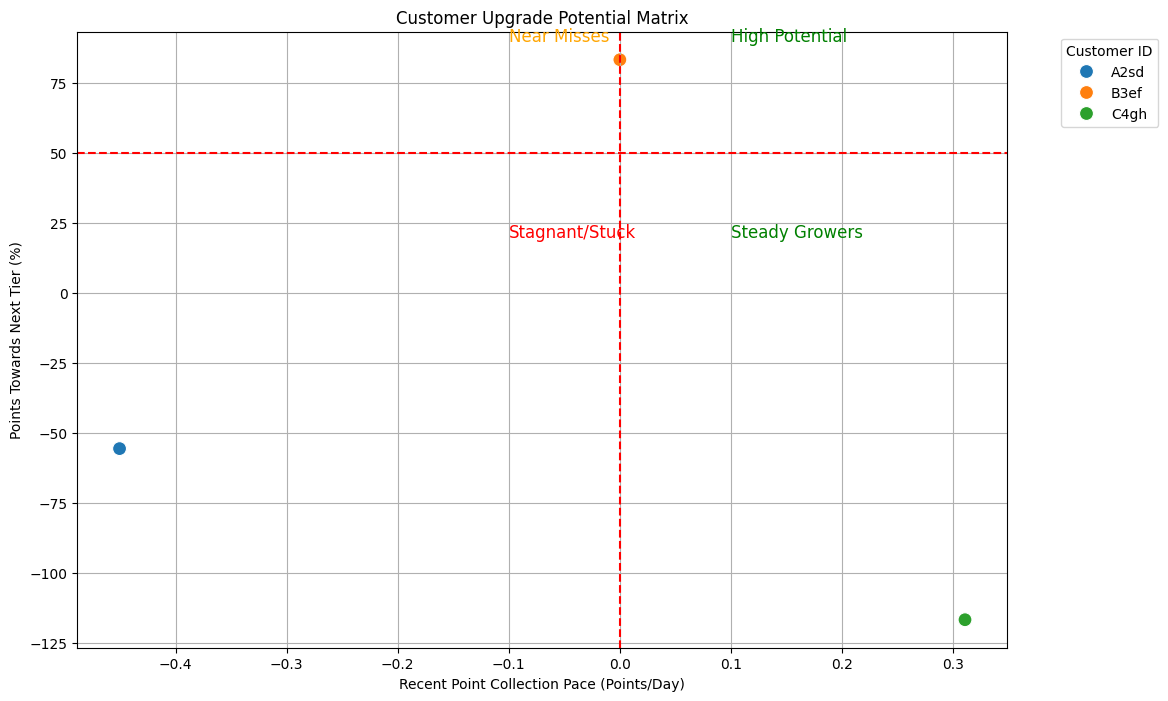

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming 'df' is your DataFrame and CURRENT_DATE is defined
# We'll re-run the logic from the previous analysis
TIER2_UPGRADE_THRESHOLD = 90
SIX_MONTHS_AGO = CURRENT_DATE - pd.DateOffset(months=6)

recent_activity = df[df['LOYALTY_TRX_DATE'] >= SIX_MONTHS_AGO].copy()
recent_summary = recent_activity.groupby('LOYALTY_CUSTOMER_REF').agg(
    RecentPoints=('ISSUED_LOYALTY_POINTS', 'sum'),
    RecentFirstTrxDate=('LOYALTY_TRX_DATE', 'min'),
    RecentLastTrxDate=('LOYALTY_TRX_DATE', 'max')
).reset_index()

recent_summary['RecentActiveDays'] = (recent_summary['RecentLastTrxDate'] - recent_summary['RecentFirstTrxDate']).dt.days
recent_summary['RecentActiveDays'] = recent_summary['RecentActiveDays'].apply(lambda x: x if x > 0 else 1)
recent_summary['RecentPointsPerDay'] = recent_summary['RecentPoints'] / recent_summary['RecentActiveDays']

last_status = df.sort_values('LOYALTY_TRX_DATE').groupby('LOYALTY_CUSTOMER_REF').last().reset_index()
upgrade_potential = last_status.merge(recent_summary, on='LOYALTY_CUSTOMER_REF', how='left').fillna(0)
upgrade_potential_tier1 = upgrade_potential[upgrade_potential['ACTUAL_TIER_CODE'] == 1].copy()

upgrade_potential_tier1['PointsTowardsNextTier_PCT'] = (upgrade_potential_tier1['CUMULATIVE_POINTS'] / TIER2_UPGRADE_THRESHOLD) * 100
upgrade_potential_tier1.loc[upgrade_potential_tier1['PointsTowardsNextTier_PCT'] > 100, 'PointsTowardsNextTier_PCT'] = 100

# Plotting the quadrant chart
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='RecentPointsPerDay',
    y='PointsTowardsNextTier_PCT',
    hue='LOYALTY_CUSTOMER_REF',
    data=upgrade_potential_tier1,
    s=100
)

# Add quadrants
plt.axhline(y=50, color='r', linestyle='--')
plt.axvline(x=upgrade_potential_tier1['RecentPointsPerDay'].median(), color='r', linestyle='--')

# Add quadrant labels
plt.text(x=upgrade_potential_tier1['RecentPointsPerDay'].median() + 0.1, y=90, s="High Potential", fontsize=12, color='green')
plt.text(x=upgrade_potential_tier1['RecentPointsPerDay'].median() + 0.1, y=20, s="Steady Growers", fontsize=12, color='green')
plt.text(x=upgrade_potential_tier1['RecentPointsPerDay'].median() - 0.1, y=90, s="Near Misses", fontsize=12, color='orange')
plt.text(x=upgrade_potential_tier1['RecentPointsPerDay'].median() - 0.1, y=20, s="Stagnant/Stuck", fontsize=12, color='red')

plt.title('Customer Upgrade Potential Matrix')
plt.xlabel('Recent Point Collection Pace (Points/Day)')
plt.ylabel('Points Towards Next Tier (%)')
plt.legend(title='Customer ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots look good
sns.set(style="whitegrid", palette="viridis")

# Example: load your dataset
# df = pd.read_csv("green_tier_data.csv")

# 1. Bar chart – Number of downgraded-from-Silver customers vs. always-in-Green
downgrade_counts = df['Ever Downgraded From tier 2'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=downgrade_counts.index.map({1:'Downgraded', 0:'Always Green'}),
            y=downgrade_counts.values)
plt.title("Downgraded-from-Silver vs Always-in-Green")
plt.ylabel("Number of Customers")
plt.xlabel("")
plt.show()

# 2. Histogram – Distribution of Missing points to tier 2
plt.figure(figsize=(6,4))
sns.histplot(df['Missing points to tier 2'], bins=20, kde=False)
plt.title("Distribution of Missing Points to Tier 2")
plt.xlabel("Missing Points")
plt.ylabel("Customer Count")
plt.show()

# 3. Box plot – Distribution of Number of Purchase TRX
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Number of Purchase TRX'])
plt.title("Distribution of Number of Purchase Transactions")
plt.xlabel("Number of Transactions")
plt.show()

# 4. Bar chart – Average spend per visit
df['Average spend per visit'] = df['Mean Original Amount Fuel SPEND'] + df['Mean Original Amount Non Fuel Spend']
avg_spend = df['Average spend per visit'].mean()
plt.figure(figsize=(4,4))
plt.bar(['Average Spend per Visit'], [avg_spend], color='skyblue')
plt.title("Average Spend per Visit")
plt.ylabel("Amount")
plt.show()

# 5. Scatter plot – Pace per TRX vs. Missing points to tier 2
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Pace per TRX', y='Missing points to tier 2', alpha=0.7)
plt.title("Pace per TRX vs Missing Points to Tier 2")
plt.xlabel("Pace per TRX")
plt.ylabel("Missing Points to Tier 2")
plt.show()

# 6. Funnel chart – Customer counts by distance to Tier 2
bins = [0, 100, 500, 1000, df['Missing points to tier 2'].max()]
labels = ["<100", "100-500", "500-1000", ">1000"]
df['Tier2 Distance Bin'] = pd.cut(df['Missing points to tier 2'], bins=bins, labels=labels, right=False)
funnel_counts = df['Tier2 Distance Bin'].value_counts().reindex(labels)

plt.figure(figsize=(6,4))
sns.barplot(x=funnel_counts.values, y=funnel_counts.index)
plt.title("Customer Count by Distance to Tier 2")
plt.xlabel("Customer Count")
plt.ylabel("Points Range")
plt.show()

# 7. Scatter plot – Days since latest activity vs. Missing points to tier 2
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Days since latest activity', y='Missing points to tier 2', alpha=0.7)
plt.title("Days Since Last Activity vs Missing Points to Tier 2")
plt.xlabel("Days Since Latest Activity")
plt.ylabel("Missing Points to Tier 2")
plt.show()


NameError: name 'df' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Average Spend per Visit
df['Average spend per visit'] = df['Mean Original Amount Fuel SPEND'] + df['Mean Original Amount Non Fuel Spend']

# --- RFM Scoring ---
# Recency: Lower days since activity is better (so reverse scoring)
df['R_Score'] = pd.qcut(df['Days since latest activity'], 5, labels=[5,4,3,2,1])

# Frequency: Higher transactions are better
df['F_Score'] = pd.qcut(df['Number of Purchase TRX'], 5, labels=[1,2,3,4,5])

# Monetary: Higher spend is better
df['M_Score'] = pd.qcut(df['Average spend per visit'], 5, labels=[1,2,3,4,5])

# Combine into segment and overall score
df['RFM_Segment'] = df['R_Score'].astype(str) + df['F_Score'].astype(str) + df['M_Score'].astype(str)
df['RFM_Score'] = df[['R_Score','F_Score','M_Score']].astype(int).sum(axis=1)

# --- Upgrade Potential Flag ---
# Let's say customers with <100 missing points are 'Upgrade Ready'
df['Upgrade_Potential'] = df['Missing points to tier 2'] < 100

# --- Visualization ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, 
                x='RFM_Score', 
                y='Missing points to tier 2', 
                hue='Upgrade_Potential', 
                palette={True:'green', False:'gray'},
                alpha=0.7)
plt.title("RFM Score vs Missing Points to Tier 2")
plt.xlabel("RFM Score (Higher = Better Customer)")
plt.ylabel("Missing Points to Tier 2")
plt.axhline(100, color='red', linestyle='--', label='Upgrade Threshold (<100 pts)')
plt.legend()
plt.show()

# --- Top Segments Table ---
top_segments = df.groupby('RFM_Segment').agg({
    'RFM_Score':'mean',
    'Missing points to tier 2':'mean',
    'Upgrade_Potential':'mean'
}).sort_values(by='RFM_Score', ascending=False)

print(top_segments.head(10))
